In [4]:
import pandas as pd
import numpy as np

original_data = pd.read_csv('adult.csv', names=[
    'Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education-num', 'Marital status', 
    'Occupations', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'Capital Loss', 
    'Source per week', 'Country', 'Target'
],na_values='?')
original_data.head()

,Age,WorkClass,Fnlwgt,Education,Education-num,Marital status,Occupations,Relationship,Race,Gender,Capital Gain,Capital Loss,Source per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


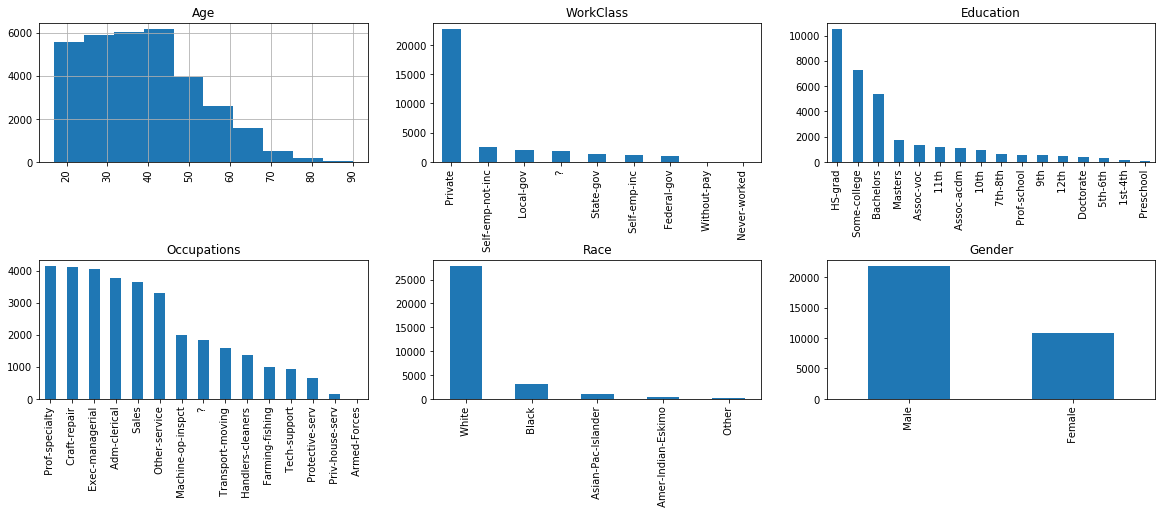

In [6]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

for i, column in enumerate(['Age', 'WorkClass', 'Education', 'Occupations', 'Race', 'Gender']):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind='bar', axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace = 0.2)
plt.show()


In [25]:
import sklearn.preprocessing as preprocessing
le = preprocessing.LabelEncoder()
original_data['Occupations'] = le.fit_transform(original_data['Occupations'].astype(str))
original_data['WorkClass'] = le.fit_transform(original_data['WorkClass'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))
original_data['Marital status'] = le.fit_transform(original_data['Marital status'].astype(str))
original_data['Relationship'] = le.fit_transform(original_data['Relationship'].astype(str))
original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Country'] = le.fit_transform(original_data['Country'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data.head()

,Age,WorkClass,Fnlwgt,Education,Education-num,Marital status,Occupations,Relationship,Race,Gender,Capital Gain,Capital Loss,Source per week,Country,Target
0,39,7,77516,5,13,4,1,1,4,1,2174,0,40,1,0
1,50,6,83311,5,13,2,8,0,4,1,0,0,13,1,0
2,38,4,215646,7,9,0,10,1,4,1,0,0,40,1,0
3,53,4,234721,1,7,2,10,0,2,1,0,0,40,1,0
4,28,4,338409,5,13,2,14,5,2,0,0,0,40,0,0


In [16]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.head()

,Age,WorkClass,Fnlwgt,Education,Education-num,Marital status,Occupations,Relationship,Race,Gender,Capital Gain,Capital Loss,Source per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,9,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,11,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,11,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,2,Wife,Black,Female,0,0,40,Cuba,0


In [17]:
original_data.Target.unique()

array([0, 1], dtype=int64)

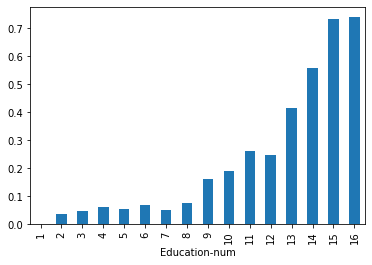

In [20]:
# we can se that as number of year of education increases we are moving more close to the target
original_data.groupby('Education-num').Target.mean().plot(kind='bar')
plt.show()

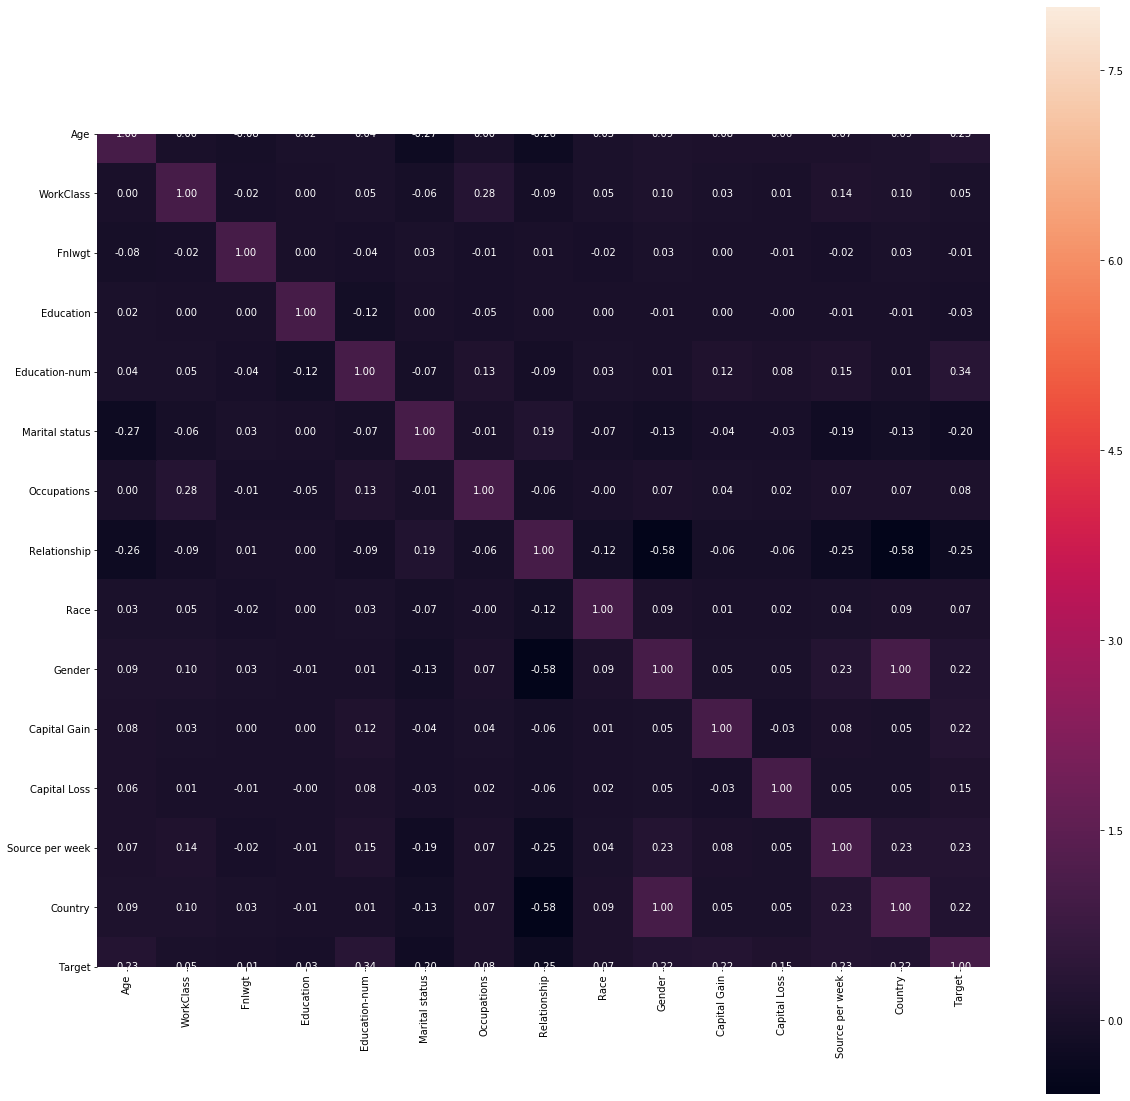

In [31]:
#building a coorealtion head map 
# to find which feature is most relevant and contribute more for finding target result
import seaborn as sns
corrmat = original_data.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, vmax=8, square=True, annot=True, fmt='.2f')
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
X = original_data[['Education-num','Occupations']]
y = original_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [36]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)

0.7844311377245509


In [37]:
X = original_data[['Education-num','Occupations','Gender', 'Age']]
y = original_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [43]:
classifier = SVC(kernel='linear', C=10)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)

0.7551051742668509


In [64]:
from itertools import combinations
m = 2
l = [1,2,3,4,5]
s = []
for i in combinations(l, m):
    temp = list(i)
    x = 0
    for j in temp:
        x+=j
    s.append(x)
print(max(s) - min(s))

6
